In this notebook, I'll compute galaxy-galaxy lensing measurements between the SDSS AGN and UNIONS 3500 deg squared catalogs.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import treecorr
import csv
from astropy.io import ascii

## Catalogs

In [2]:
#AGN
data_agn = ascii.read('/n17data/russier/SDSS_SMBH')

#UNIONS
data_path = "/home/mkilbing/astro/data/UNIONS/v1.0/ShapePipe/"
fits_un= data_path + "unions_shapepipe_extended_2022_v1.0.fits"
hdu2 = fits.open(fits_un)
un_data = hdu2[1].data

## Path where you want to stock your cross-correlation (cc) files

In [14]:
cc_path = "/n17data/russier/agn_ggl/cc_files/"

In [15]:
cc_path_test = input("Enter test path to stock cc_files, don't forget to create the repo before :")

Enter test path to stock cc_files, don't forget to create the repo before :all_3500degsq_UNIONS_AGN/


In [23]:
cc_path_test

'all_3500degsq_UNIONS_AGN/'

## Figure size

In [3]:
ticks_size = 15
label_size = 18

## Tree corr computation

In [4]:
sep_units = 'arcmin'

TreeCorrConfig = {
        'ra_units': 'degrees',
        'dec_units': 'degrees',
        'max_sep': '200',
        'min_sep': '0.1',
        'sep_units': sep_units,
        'nbins': 10}

In [7]:
cat_mass = treecorr.Catalog(
    ra=data_agn['col1'],
    dec=data_agn['col2'],
    ra_units='degrees',
    dec_units='degrees'
)

In [8]:
cat_un = treecorr.Catalog(
    ra=un_data['ra'],
    dec=un_data['dec'],
    g1=un_data['e1'],
    g2=un_data['e2'],
    w=un_data['w'],
    ra_units='degrees',
    dec_units='degrees'
)

In [9]:
ng = treecorr.NGCorrelation(TreeCorrConfig)
ng.process(cat_mass, cat_un)

In [16]:
ng.write(cc_path + cc_path_test + "ggl_all_UNIONS_v1_agn.fits", rg=None, file_type=None, precision=None)

In [24]:
fn = ["ggl_all_UNIONS_v1_agn.fits"]
data_cc = {}
r_mean = {}
gamX = {}
gamT = {}
sigma = {}
#def RA, DEC and Z
for fname in (fn):
    f = fits.open(cc_path + cc_path_test + fname)
    data_cc = f[1].data
    r_mean = f[1].data["meanr"]
    gamX = f[1].data["gamX"]
    gamT = f[1].data["gamT"]
    sigma = f[1].data["sigma"]

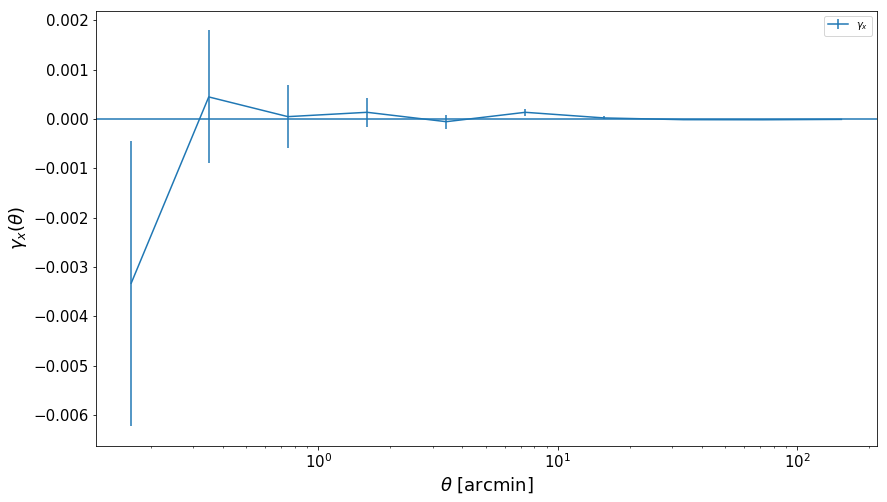

In [25]:
plt.figure(figsize=(14,8))


plt.errorbar(r_mean, gamX,yerr=sigma, label=r'$\gamma_x$')
plt.axhline(y = 0)
plt.xscale('log')
plt.xlabel(rf'$\theta$ [{sep_units}]', fontsize=label_size)
_ = plt.ylabel(r'$\gamma_x(\theta)$', fontsize=label_size)
plt.xticks(fontsize=ticks_size)
plt.yticks(fontsize=ticks_size)
plt.legend()
plt.show()

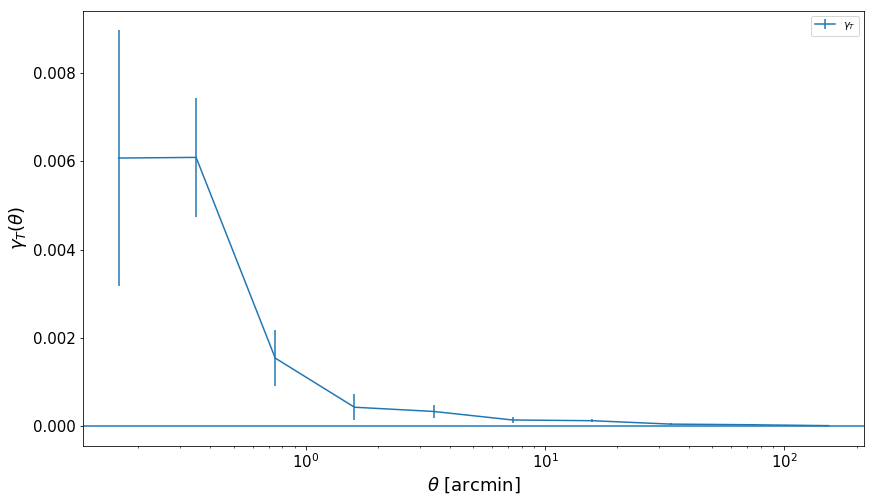

In [26]:
plt.figure(figsize=(14,8))

plt.errorbar(r_mean, gamT, yerr=sigma, label = r'$\gamma_T$')
plt.axhline(y = 0)
plt.xscale('log')
plt.xlabel(rf'$\theta$ [{sep_units}]', fontsize=label_size)
_ = plt.ylabel(r'$\gamma_T(\theta)$', fontsize=label_size)
plt.xticks(fontsize=ticks_size)
plt.yticks(fontsize=ticks_size)
plt.legend()
plt.show()

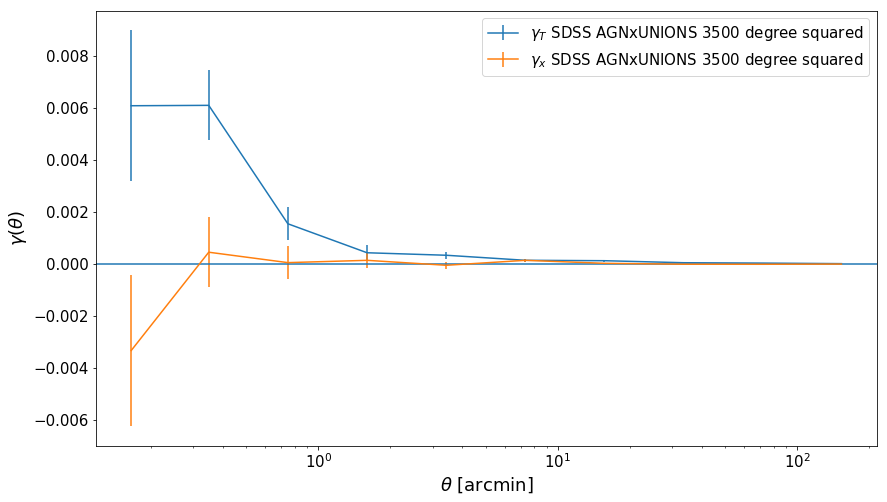

In [32]:
plt.figure(figsize=(14,8))

plt.errorbar(r_mean, gamT, yerr=sigma, label = "$\gamma_T$ SDSS AGNxUNIONS 3500 degree squared")
plt.errorbar(r_mean, gamX, yerr=sigma, label= "$\gamma_x$ SDSS AGNxUNIONS 3500 degree squared")
plt.xscale("log")
plt.axhline(y = 0)
plt.xlabel(rf'$\theta$ [{sep_units}]', fontsize=label_size)
plt.ylabel(r'$\gamma(\theta)$', fontsize=label_size)
plt.xticks(fontsize = ticks_size)
plt.yticks(fontsize = ticks_size)
plt.legend(fontsize = ticks_size)
plt.show()